# NSIDC Iceflow example

This notebook shows an example of how to use the `nsidc-iceflow` Python library to do ITRF transformations with real data. We recommend starting with the [corrections.ipynb](https://github.com/nsidc/NSIDC-Data-Tutorials/blob/main/notebooks/iceflow/corrections.ipynb) notebook to learn more about ITRF transformations and why they matter.
## Finding, downloading, and reading data

Lets assume we want to do an analysis using [IceBridge ATM L1B Qfit Elevation and Return Strength, Version 1 (ILATM1B)](https://nsidc.org/data/ilatm1b/versions/1) data near Pine Island Glacier in Antarctica.

Finding, downloading, and reading ILATM1B v1 data with `nsidc-iceflow` is straightforward. 

In [1]:
from pathlib import Path
import datetime as dt

from nsidc.iceflow.api import fetch_iceflow_df
from nsidc.iceflow.data.models import DatasetSearchParameters, BoundingBox, ILATM1BDataset

# Downloaded data will go here.
data_path = Path("./downloaded-data/")

# Define a bounding box for our area of interest. Note that this is a very small area near Pine Island Glacier.
# ILATM1B data can be very large, so for the purposes of this example we will focus on just a small area with a manageable amount of data.
BBOX = BoundingBox(lower_left_lon=-103.125559, lower_left_lat=-75.180563, upper_right_lon=-102.677327, upper_right_lat=-74.798063)

# Define the dataset that we want to search for.
atm1b_v1_dataset = ILATM1BDataset(version="1")

# We will define a short date range in 2009 to search for data. Again, we choose this primarily to keep the amount of data manageable.
date_range = (dt.date(2009, 11, 1), dt.date(2009, 12, 31))

# Now use the `fetch_iceflow_df` function to search for and download data matching our search parameters. The output is a pandas DataFrame containing the matching data.
iceflow_df = fetch_iceflow_df(
    dataset_search_params=DatasetSearchParameters(
        dataset=atm1b_v1_dataset,
        bounding_box=BBOX,
        temporal=date_range,
    ),
    output_dir=data_path,
    output_itrf=None,
)

iceflow_df

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

,rel_time,latitude,longitude,elevation,xmt_sigstr,rcv_sigstr,azimuth,pitch,roll,gps_pdop,pulse_width,gps_time,passive_signal,passive_footprint_latitude,passive_footprint_longitude,passive_footprint_synthesized_elevation,ITRF
utc_datetime,,,,,,,,,,,,,,,,,
2009-11-09 20:31:49.000,0.0,-75.159033,-102.290217,136.427994,1406.0,1393.0,164903.0,1547.0,1253.0,24.0,7.0,203204000.0,NaN,NaN,NaN,NaN,ITRF2005
2009-11-09 20:31:49.000,0.0,-75.159036,-102.290130,136.436996,973.0,1064.0,166291.0,1547.0,1253.0,24.0,6.0,203204000.0,NaN,NaN,NaN,NaN,ITRF2005
2009-11-09 20:31:49.000,0.0,-75.159041,-102.290045,136.386002,1586.0,1546.0,167679.0,1547.0,1253.0,24.0,7.0,203204000.0,NaN,NaN,NaN,NaN,ITRF2005
2009-11-09 20:31:49.000,0.0,-75.159046,-102.289961,136.347000,1101.0,1192.0,169067.0,1547.0,1253.0,24.0,7.0,203204000.0,NaN,NaN,NaN,NaN,ITRF2005
2009-11-09 20:31:49.001,1.0,-75.159051,-102.289878,136.298996,1302.0,1296.0,170455.0,1547.0,1253.0,24.0,8.0,203204001.0,NaN,NaN,NaN,NaN,ITRF2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-11-09 20:35:44.975,235973.0,-74.985030,-102.449293,-29.997000,1498.0,186.0,212854.0,2475.0,15678.0,26.0,5.0,203559975.0,NaN,NaN,NaN,NaN,ITRF2005
2009-11-09 20:35:44.976,235973.0,-74.984972,-102.449623,-29.707001,1398.0,342.0,217001.0,2475.0,15678.0,26.0,6.0,203559976.0,NaN,NaN,NaN,NaN,ITRF2005
2009-11-09 20:35:44.980,235978.0,-74.984355,-102.451848,-30.549999,1279.0,246.0,246038.0,2477.0,15677.0,26.0,7.0,203559980.0,NaN,NaN,NaN,NaN,ITRF2005


For the purposes of the rest of this example, we will narrow our focus to just the latitdue, longitude, and elevation, and the ITRF data

In [2]:
iceflow_df = iceflow_df[["latitude", "longitude", "elevation", "ITRF"]]
iceflow_df

,latitude,longitude,elevation,ITRF
utc_datetime,,,,
2009-11-09 20:31:49.000,-75.159033,-102.290217,136.427994,ITRF2005
2009-11-09 20:31:49.000,-75.159036,-102.290130,136.436996,ITRF2005
2009-11-09 20:31:49.000,-75.159041,-102.290045,136.386002,ITRF2005
2009-11-09 20:31:49.000,-75.159046,-102.289961,136.347000,ITRF2005
2009-11-09 20:31:49.001,-75.159051,-102.289878,136.298996,ITRF2005
...,...,...,...,...
2009-11-09 20:35:44.975,-74.985030,-102.449293,-29.997000,ITRF2005
2009-11-09 20:35:44.976,-74.984972,-102.449623,-29.707001,ITRF2005
2009-11-09 20:35:44.980,-74.984355,-102.451848,-30.549999,ITRF2005


## ITRF transformations

Lets say we have other data that are in ITRF2014, and we want to compare the ILATM1B v1 data we just fetched to it. `nsidc-iceflow` provides a `transform_itrf` function that allows the user to transform latitude, longitude, and elevation data from an `nsidc-iceflow` dataframe into a target ITRF.

In [3]:
from nsidc.iceflow.itrf.converter import transform_itrf

itrf2014_df = transform_itrf(data=iceflow_df, target_itrf="ITRF2014")
itrf2014_df

,latitude,longitude,elevation,ITRF
utc_datetime,,,,
2009-11-09 20:31:49.000,-75.159033,-102.290217,136.420352,ITRF2014
2009-11-09 20:31:49.000,-75.159036,-102.290130,136.429354,ITRF2014
2009-11-09 20:31:49.000,-75.159041,-102.290045,136.378359,ITRF2014
2009-11-09 20:31:49.000,-75.159046,-102.289961,136.339358,ITRF2014
2009-11-09 20:31:49.001,-75.159051,-102.289878,136.291354,ITRF2014
...,...,...,...,...
2009-11-09 20:35:44.975,-74.985030,-102.449293,-30.004634,ITRF2014
2009-11-09 20:35:44.976,-74.984972,-102.449623,-29.714635,ITRF2014
2009-11-09 20:35:44.980,-74.984355,-102.451848,-30.557633,ITRF2014


Let's take a look at the differences between the original data (ITRF2005) and the data that has been transformed to ITRF2014.

In [4]:
for variable in ["latitude", "longitude", "elevation"]:
    print(f"Max difference in {variable}: {abs(itrf2014_df[variable] - iceflow_df[variable]).max()}")

Max difference in latitude: 1.8509084043216717e-08
Max difference in longitude: 7.9922898521545e-08
Max difference in elevation: 0.00764224398881197


We can see here that the differences are very small! The largest elevation difference is 0.007 - 7mm!

## Propagating data to a new epoch

Now lets assume we need to propagate the data to a target epoch of 2019.7, which corresponds to September 13, 2019. This accounts for continental plate motion.

The `transform_itrf` function optionally takes a `target_epoch` in order to do this transformation, which we'll use the original data as input

In [5]:
itrf2014_epoch_2019_7_df = transform_itrf(
    data=iceflow_df,
    target_itrf="ITRF2014",
    target_epoch="2019.7",
)

itrf2014_epoch_2019_7_df

,latitude,longitude,elevation,ITRF
utc_datetime,,,,
2009-11-09 20:31:49.000,-75.159033,-102.290223,136.420439,ITRF2014
2009-11-09 20:31:49.000,-75.159036,-102.290136,136.429442,ITRF2014
2009-11-09 20:31:49.000,-75.159041,-102.290051,136.378447,ITRF2014
2009-11-09 20:31:49.000,-75.159046,-102.289967,136.339446,ITRF2014
2009-11-09 20:31:49.001,-75.159051,-102.289884,136.291442,ITRF2014
...,...,...,...,...
2009-11-09 20:35:44.975,-74.985030,-102.449299,-30.004546,ITRF2014
2009-11-09 20:35:44.976,-74.984972,-102.449629,-29.714547,ITRF2014
2009-11-09 20:35:44.980,-74.984355,-102.451854,-30.557545,ITRF2014


The maximum difference is still small:

In [6]:
for variable in ["latitude", "longitude", "elevation"]:
    print(f"Max difference in {variable}: {abs(itrf2014_epoch_2019_7_df[variable] - iceflow_df[variable]).max()}")

Max difference in latitude: 4.5290964578725834e-07
Max difference in longitude: 5.7121024497064354e-06
Max difference in elevation: 0.007554532028734684


## Visualizing the differences

To visualize the differences, which are very small, we need to zoom in on just a small subset of points.

In [7]:
filter_condition = (iceflow_df.reset_index().index > 50) & ( iceflow_df.reset_index().index < 60)
sampled_iceflow_df = iceflow_df[filter_condition]
sampled_itrf2014_df = itrf2014_df[filter_condition]
sampled_itrf2014_epoch_2019_7_df = itrf2014_epoch_2019_7_df[filter_condition]

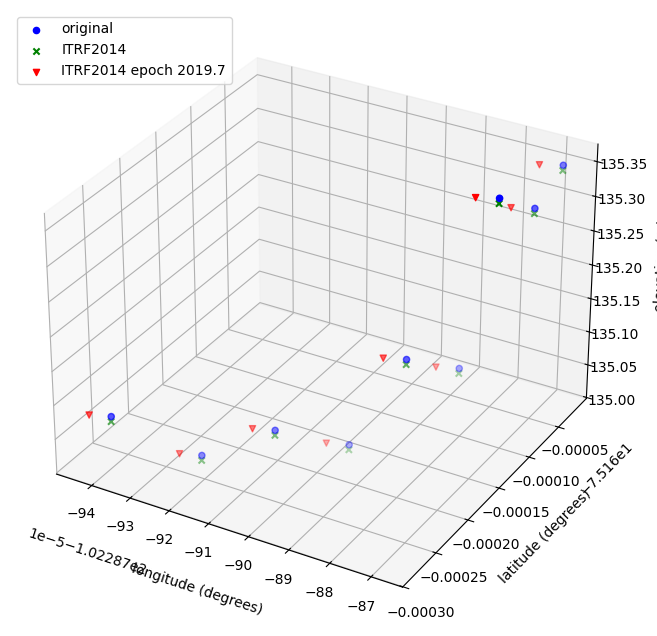

In [8]:
import matplotlib.pyplot as plt
# note: use `inline` to save the resulting image as an embedded png (nice for sharing). \
# Use `widget` to obtain interactive controls to explore the data in depth!
%matplotlib inline
# %matplotlib widget


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    sampled_iceflow_df.longitude.values,
    sampled_iceflow_df.latitude.values,
    sampled_iceflow_df.elevation.values,
    color="blue",
    marker="o",
    label="original",
)

ax.scatter(
    sampled_itrf2014_df.longitude.values,
    sampled_itrf2014_df.latitude.values,
    sampled_itrf2014_df.elevation.values,
    color="green",
    marker="x",
    label="ITRF2014",
)

ax.scatter(
    sampled_itrf2014_epoch_2019_7_df.longitude.values,
    sampled_itrf2014_epoch_2019_7_df.latitude.values,
    sampled_itrf2014_epoch_2019_7_df.elevation.values,
    color="red",
    marker="v",
    label="ITRF2014 epoch 2019.7",
)

ax.set_xlabel("longitude (degrees)", labelpad=10)
ax.set_ylabel("latitude (degrees)", labelpad=10)
ax.set_zlabel("elevation (m)", labelpad=10)
plt.legend(loc="upper left")
plt.show()